In [25]:
import pandas as pd
import spacy
import numpy as np
import wordcloud
import re
import string
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [11]:
def lemmatize(doc):
    return ' '.join([token.lemma_ for token in doc])

def lemmatize_and_filter_by_pos(doc, valid_tags):
    return ' '.join([token.lemma_ for token in doc 
                     if token.pos_ in valid_tags])

def change_label(label):
    if label == "offensive_language":
        return 1
    elif label == "hate_speech":
        return 1
    else:
        return 0
def lower_case(text):
  return str(text.lower())
def wordcloud(df, label):
    # Print only rows where the toxic category label value is 1 
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=4000)

    wc.generate(" ".join(str(text)))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequent in the data", fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

###WR stands for with rules

In [51]:
dfWR = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DATASCI/project/withrules.csv')
dfWR.tail()

Unnamed: 0  ...   neither
9995        9995  ...  0.599660
9996        9996  ...  0.432786
9997        9997  ...  0.579916
9998        9998  ...  0.621796
9999        9999  ...  0.630171

[5 rows x 6 columns]

In [14]:
dfWR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   text                10000 non-null  object 
 2   top_class           10000 non-null  object 
 3   hate_speech         10000 non-null  float64
 4   offensive_language  10000 non-null  float64
 5   neither             10000 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 468.9+ KB


In [15]:
#Drop unecessary columns
dfWR = dfWR.drop(["Unnamed: 0","hate_speech", "offensive_language", "neither"], axis=1)
#Make top_class binary as toxic(1) or not toxic(0)
dfWR['toxic'] = dfWR['top_class'].apply(lambda x: change_label(x))
#convert text to string type
dfWR['text'] = dfWR['text'].astype(str)

###Toxic Chats in streamers who impose rules

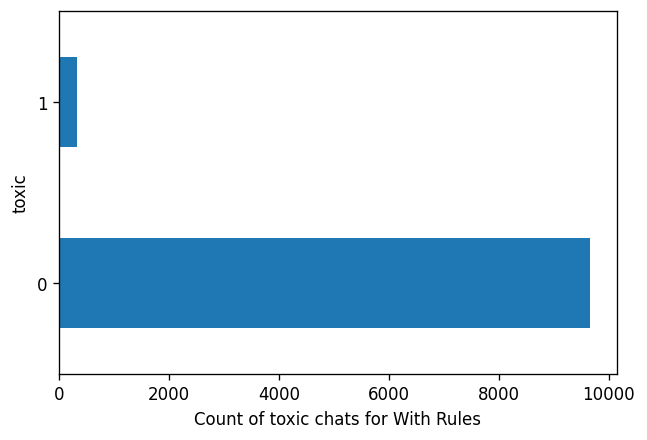

In [21]:
fig, ax = plt.subplots(figsize=(6,4), dpi=120)
dfWR.groupby('toxic')['toxic'].count().plot(kind='barh', ax=ax)
ax.set_xlabel('Count of toxic chats for With Rules');

In [17]:
dfWR['text']=dfWR['text'].apply(lambda x: lower_case(x))

In [18]:
dfWR.tail()

text           top_class  toxic
9995                       it will not load up             neither      0
9996                                        yo  offensive_language      1
9997  maybe you have to exit to get the update             neither      0
9998                         what is happening             neither      0
9999                                       ...             neither      0

In [19]:
# Initialize Spacy Model
nlp = spacy.load("en_core_web_sm")
# Parse the text using the Spacy model
dfWR['text'] = dfWR['text'].apply(lambda comment: nlp(comment))

In [20]:
dfWR.tail()

text  ... toxic
9995                          (it, will, not, load, up)  ...     0
9996                                               (yo)  ...     1
9997  (maybe, you, have, to, exit, to, get, the, upd...  ...     0
9998                              (what, is, happening)  ...     0
9999                                              (...)  ...     0

[5 rows x 3 columns]

###Visualization

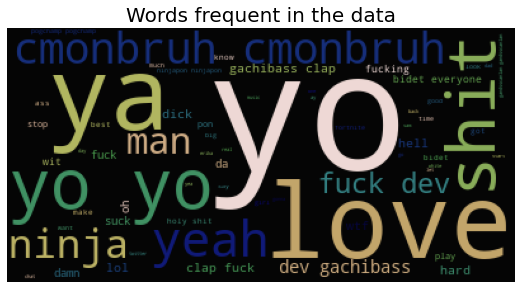

In [22]:
subset=dfWR[dfWR['toxic']==1]
text = subset.text.values
wordcloud = WordCloud().generate(str(text))
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequent in the data", fontsize=20)
plt.imshow(wordcloud.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

In [24]:
subsetWR=dfWR[dfWR['toxic']==1]
textWR=subsetWR['text'].values
textWR = ' '.join([str(elem) for elem in text])
textWR=re.sub(pattern = "[^\w\s]", repl = "", string = textWR)
textWR=re.sub(pattern = "(\s\s)", repl = " ", string = textWR)
textWR

'so much chat aint nobody can read that fast beep beep yall samriegel this is on you biblethump its time to kill that stupid dragon lol bidet everyone bidet all no sound her either but theyll get it hey everyone i just want you all to know that i love you all this is insanity they are on time holy shit ya i have to go line up infront of gamestop soon for the switch holy shit gandsscanlan gandsscanlan gandsscanlan gandsscanlan theyre in hell its dark no pike no sam theyd better not take hell beep beep all whats up everyone columbiasc lol wtf sam the golden girls oh yeah bidet all lag wtf all the theories bidet to all my fellow arizonans this is critical role where a bunch of nerdy ass voice actors play dungeons and dragons all my georgia critters say hell yeah marisha is wearing sleeves thats bull shit sleeves are so bullshit who who is the white girl damn sam shit going down so happy to have her here im so nervious that is how you do sponsorship holy shit hell yeah do they get to use t

In [42]:
wordsWR=textWR.split(' ')
wordsWR=dict(Counter(wordsWR))
wordsWR=pd.DataFrame.from_dict(wordsWR, orient='index').reset_index()
wordsWR.columns=['text','count']
wordsWR =wordsWR.sort_values(by=['count'],ascending=False)
wordsWR

text  count
15           you     71
348           yo     64
36             i     37
78            my     32
170         fuck     31
..           ...    ...
251    stilljust      1
249          rad      1
247     tzimisce      1
246  livestreams      1
577    fortnites      1

[578 rows x 2 columns]

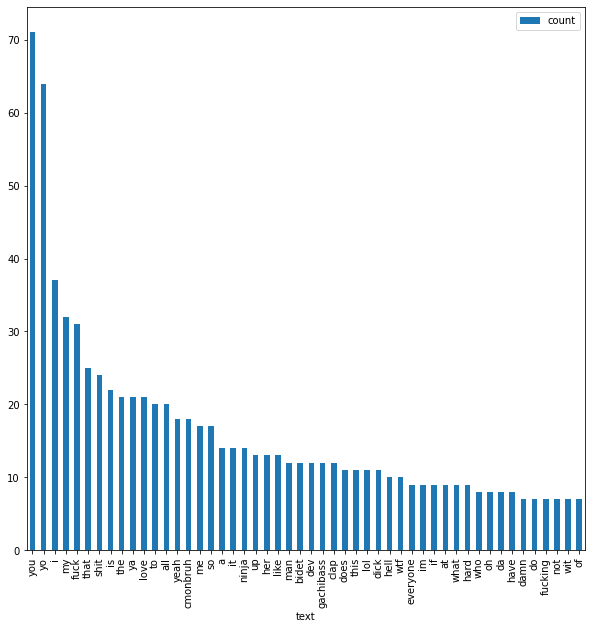

In [48]:
top20 = wordsWR.head(50)
top20.plot.bar(x="text",y="count",figsize=(10,10))

###NR stands for no rules

In [50]:
dfNR = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DATASCI/project/norules.csv')
dfNR.tail()

Unnamed: 0               text  ... offensive_language   neither
9995        9995               !res  ...           0.330376  0.630171
9996        9996                vac  ...           0.330376  0.630171
9997        9997           DansGame  ...           0.330376  0.630171
9998        9998  @Karnage_105 SLAY  ...           0.330376  0.630171
9999        9999               Why?  ...           0.368591  0.614641

[5 rows x 6 columns]

In [52]:
dfNR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   text                10000 non-null  object 
 2   top_class           10000 non-null  object 
 3   hate_speech         10000 non-null  float64
 4   offensive_language  10000 non-null  float64
 5   neither             10000 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 468.9+ KB


In [53]:
#Drop unecessary columns
dfNR =dfNR.drop(["Unnamed: 0","hate_speech", "offensive_language", "neither"], axis=1)
#Make top_class binary as toxic(1) or not toxic(0)
dfNR['toxic'] = dfNR['top_class'].apply(lambda x: change_label(x))
#convert text to string type
dfNR['text'] = dfNR['text'].astype(str)

###Toxic Chats in streamers who does not impose rules

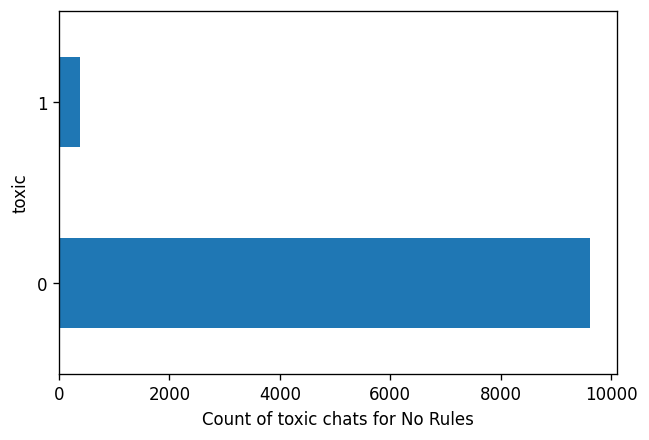

In [54]:
fig, ax = plt.subplots(figsize=(6,4), dpi=120)
dfNR.groupby('toxic')['toxic'].count().plot(kind='barh', ax=ax)
ax.set_xlabel('Count of toxic chats for No Rules');

In [55]:
dfNR['text']=dfWR['text'].apply(lambda x: lower_case(x))
dfNR.tail()

text top_class  toxic
9995                       it will not load up   neither      0
9996                                        yo   neither      0
9997  maybe you have to exit to get the update   neither      0
9998                         what is happening   neither      0
9999                                       ...   neither      0

In [56]:
# Initialize Spacy Model
nlp = spacy.load("en_core_web_sm")
# Parse the text using the Spacy model
dfNR['text'] = dfNR['text'].apply(lambda comment: nlp(comment))

In [57]:
dfNR.tail()

text top_class  toxic
9995                          (it, will, not, load, up)   neither      0
9996                                               (yo)   neither      0
9997  (maybe, you, have, to, exit, to, get, the, upd...   neither      0
9998                              (what, is, happening)   neither      0
9999                                              (...)   neither      0

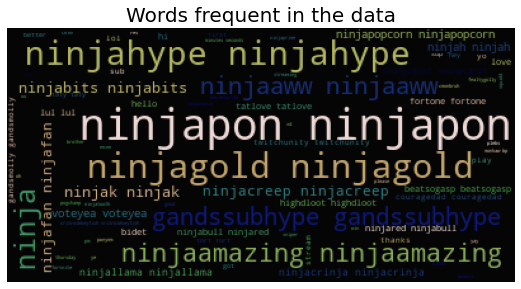

In [58]:
subset=dfNR[dfNR['toxic']==1]
text = subset.text.values
wordcloud = WordCloud().generate(str(text))
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequent in the data", fontsize=20)
plt.imshow(wordcloud.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

In [94]:
subsetNR=dfNR[dfNR['toxic']==1]
textNR=subsetNR['text'].values
textNR = ' '.join([str(elem) for elem in text])
#remove non words such as punctuation
textNR=re.sub(pattern = "[^\w\s]", repl = "", string = textNR)
#remove emotes
textNR=re.sub(pattern = "(ninja)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(gands)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(twitch)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(vote)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(courage)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(sean)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(high)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(beat)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(tat)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(ninja)", repl = "", string = textNR)



textNR=re.sub(pattern = "(\s\s+)", repl = " ", string = textNR)
textNR

'yay good evening vox machina so much chat aint nobody can read that fast what did i miss yay i love taliesin wooooooo thx crew and mods for tonight enjoy the love all bidet from kansas fix himthe sound woo lol that disguised doty though you can fit some countries inside texas awwhooooooooooo 8d travis i have that shirt too bidet from north dakota caught up today 100 lets do it critical role is on at 7 pm pdt on thursdays it is currently 244 pm pdt on thursday there is 4 hours 15 minutes 46 seconds until the next episode of critical role this has command has been run 307 times but has probably been asked about way more woohoo bidet from virginia im commander shepard and shield of tomorrow is my favorite stream on the citadel bidet from prince george bc easy win how amazing would it have been if the intro had matt dressed as vecna for this episode bidet to all those in wisconsin and every where else getting fables flashbacks haha xd oh i faught its today i love all the new characters in

In [95]:
wordsNR=textNR.split(' ')
wordsNR=dict(Counter(wordsNR))
wordsNR=pd.DataFrame.from_dict(wordsNR, orient='index').reset_index()
wordsNR.columns=['text','count']
wordsNR =wordsNR.sort_values(by=['count'],ascending=False)
wordsNR

text  count
16           i     26
28         the     23
64          is     17
371        lul     16
41         you     15
..         ...    ...
305        may      1
304      rolls      1
303       keep      1
97        more      1
315  archangel      1

[630 rows x 2 columns]

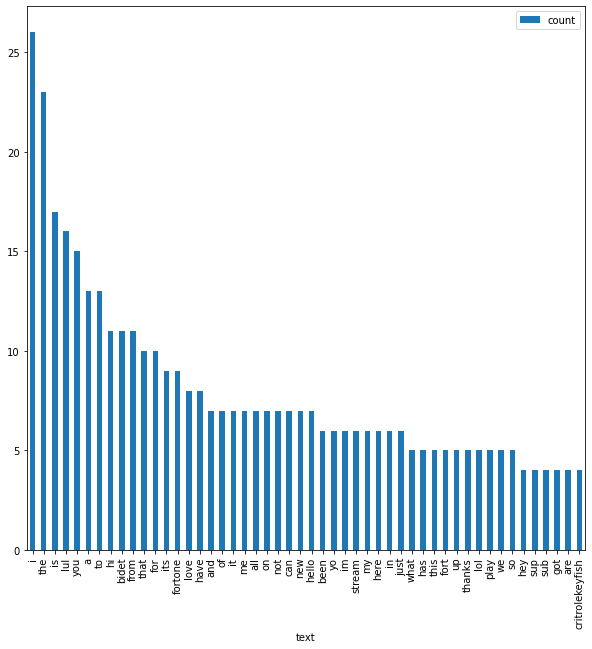

In [100]:
top50 = wordsNR.head(50)
top50.plot.bar(x="text",y="count",figsize=(10,10))

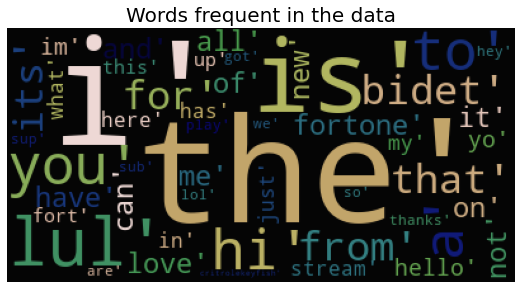

In [103]:
textNR = top50.text.values
wordcloud = WordCloud().generate(str(textNR))
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequent in the data", fontsize=20)
plt.imshow(wordcloud.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

In [115]:
subsetNR=dfNR[dfNR['toxic']==1]
bot50 = wordsNR[wordsNR['count']<=4]
bot50 = bot50[bot50['count']>=2]
bot50

text  count
358        hey      4
169        sup      4
346        sub      4
437        got      4
351        are      4
..         ...    ...
70   thursdays      2
2      evening      2
63        role      2
69         pdt      2
6         much      2

[131 rows x 2 columns]

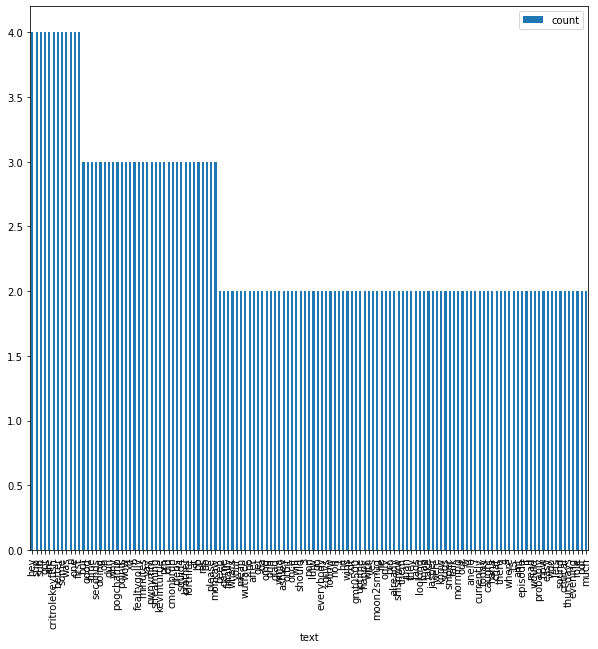

In [116]:
bot50.plot.bar(x="text",y="count",figsize=(10,10))


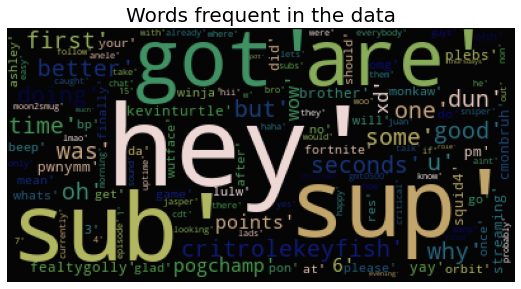

In [117]:
textNR = bot50.text.values
wordcloud = WordCloud().generate(str(textNR))
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequent in the data", fontsize=20)
plt.imshow(wordcloud.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

###Whole data No Rules

In [118]:
dfNR = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DATASCI/project/withoutrules/WithoutRules.csv')
dfNR.tail()

text  ...   neither
1873768                                        LOL  ...  0.491065
1873769                                   god damn  ...  0.043885
1873770  racism in america definitely isnt done :/  ...  0.587489
1873771                              inb4 loss LUL  ...  0.630171
1873772                                        WTF  ...  0.166007

[5 rows x 5 columns]

In [119]:
dfNR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873773 entries, 0 to 1873772
Data columns (total 5 columns):
 #   Column              Dtype  
---  ------              -----  
 0   text                object 
 1   top_class           object 
 2   hate_speech         float64
 3   offensive_language  float64
 4   neither             float64
dtypes: float64(3), object(2)
memory usage: 71.5+ MB


In [121]:
#Drop unecessary columns
dfNR =dfNR.drop(["hate_speech", "offensive_language", "neither"], axis=1)
#Make top_class binary as toxic(1) or not toxic(0)
dfNR['toxic'] = dfNR['top_class'].apply(lambda x: change_label(x))
#convert text to string type
dfNR['text'] = dfNR['text'].astype(str)

In [123]:
dfNR.tail()

text           top_class  toxic
1873768                                        LOL             neither      0
1873769                                   god damn  offensive_language      1
1873770  racism in america definitely isnt done :/             neither      0
1873771                              inb4 loss LUL             neither      0
1873772                                        WTF  offensive_language      1

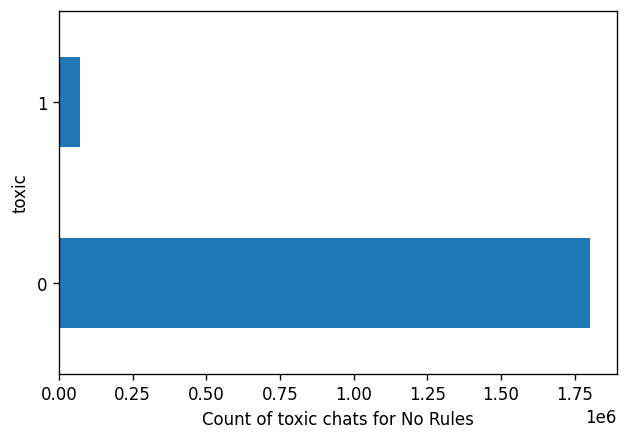

In [122]:
fig, ax = plt.subplots(figsize=(6,4), dpi=120)
dfNR.groupby('toxic')['toxic'].count().plot(kind='barh', ax=ax)
ax.set_xlabel('Count of toxic chats for No Rules');

In [ ]:
dfNR['text']=dfWR['text'].apply(lambda x: lower_case(x))
dfNR.tail()

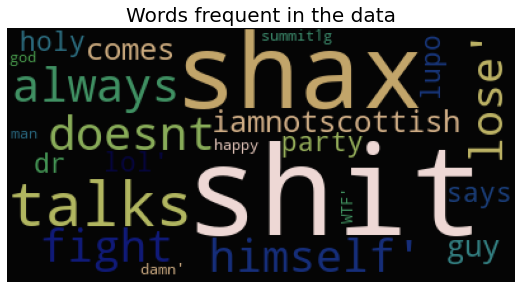

In [124]:
subset=dfNR[dfNR['toxic']==1]
text = subset.text.values
wordcloud = WordCloud().generate(str(text))
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequent in the data", fontsize=20)
plt.imshow(wordcloud.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

In [155]:
subsetNR=dfNR[dfNR['toxic']==1]
textNR=subsetNR['text'].values
textNR = ' '.join([str(elem) for elem in text])
#remove non words such as punctuation
textNR=re.sub(pattern = "[^\w\s]", repl = "", string = textNR)
#remove emotes
textNR=re.sub(pattern = "(ninja)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(gands)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(twitch)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(vote)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(courage)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(sean)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(high)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(beat)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(tat)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(shroud)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(lupo)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(lirik)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(drlupo)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(summit1g)\w+", repl = "", string = textNR)


textNR=re.sub(pattern = "(\s\s+)", repl = " ", string = textNR)
print(textNR)

N i c k l i k e s t o p l a y f o o t b a l l h o w e v e r h e i s n o t t o o f o n d o f t e n n i s 


In [137]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [142]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [144]:
text_tokens = word_tokenize(textNR)

tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

print(tokens_without_sw)

['shax', 'always', 'talks', 'shit', 'doesnt', 'fight', 'shax', 'talks', 'shit', 'lose', 'iamnotscottish', 'guy', 'comes', 'party', 'says', 'holy', 'shit', 'dr', 'lupo', 'lol', 'drlupo', 'I', 'dont', 'know', 'I', 'missed', 'ass', 'I', 'miss', 'Rambo', 'Headsnipe01', 'AVICII', 'RICK', 'ASTLEY', 'Never', 'Gon', 'Wake', 'You', 'Up', 'NilsOfficial', 'Mashup', 'nilsofficial', 'current', 'song', 'It', 'requested', 'Lord_cthulhu0220', 'httpsyoutubeoT3mCybbhf0', 'shit', 'DrLupo', 'sneaky', 'snek', 'lupo', 'id', 'love', 'run', 'sometime', 'playd', 'like', '5', 'times', 'haha', 'lupo', 'fucking', 'sneaky', 'tonight', 'lmao', 'D0cR3d', 'AVICII', 'RICK', 'ASTLEY', 'Never', 'Gon', 'Wake', 'You', 'Up', 'NilsOfficial', 'Mashup', 'nilsofficial', 'current', 'song', 'It', 'requested', 'Lord_cthulhu0220', 'httpsyoutubeoT3mCybbhf0', 'hate', 'damn', 'dude', 'bad', 'lol', 'haha', 'looks', 'funny', 'damn', 'reload', 'holy', 'fuck', 'Damn', 'I', 'love', 'sweet', 'casserole', 'ozekken', 'lupoLOVE', 'ggs', 'Lmao

In [161]:
textNR = ' '.join([str(elem) for elem in tokens_without_sw])
textNR=textNR.lower()
textNR

'shax always talks shit doesnt fight shax talks shit lose iamnotscottish guy comes party says holy shit dr lupo lol drlupo i dont know i missed ass i miss rambo headsnipe01 avicii rick astley never gon wake you up nilsofficial mashup nilsofficial current song it requested lord_cthulhu0220 httpsyoutubeot3mcybbhf0 shit drlupo sneaky snek lupo id love run sometime playd like 5 times haha lupo fucking sneaky tonight lmao d0cr3d avicii rick astley never gon wake you up nilsofficial mashup nilsofficial current song it requested lord_cthulhu0220 httpsyoutubeot3mcybbhf0 hate damn dude bad lol haha looks funny damn reload holy fuck damn i love sweet casserole ozekken lupolove ggs lmao didnt shit damn fine stuff sir drlupo lets fucking go fuckin love bro hahahahhahaha damn itstaylortime hiiiii lupo stop xd yo lupohype lupo we 3 lupo sr mood love youlove youlove youlove youlove youlove youlove youlove youlove youlove youlove youlove youlove youlove drlupo you need some tripmines in your life sr m

In [165]:
#remove emotes
textNR=re.sub(pattern = "(ninja)\w*", repl = "", string = textNR)
textNR=re.sub(pattern = "(gands)\w*", repl = "", string = textNR)
textNR=re.sub(pattern = "(twitch)\w*", repl = "", string = textNR)
textNR=re.sub(pattern = "(vote)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(courage)\w*", repl = "", string = textNR)
textNR=re.sub(pattern = "(sean)\w*", repl = "", string = textNR)
textNR=re.sub(pattern = "(high)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(beat)\w*", repl = "", string = textNR)
textNR=re.sub(pattern = "(tat)\w*", repl = "", string = textNR)
textNR=re.sub(pattern = "(timthetat)\w*", repl = "", string = textNR)
textNR=re.sub(pattern = "(shroud)\w*", repl = "", string = textNR)
textNR=re.sub(pattern = "(lupo)\w*", repl = "", string = textNR)
textNR=re.sub(pattern = "(lirik)\w*", repl = "", string = textNR)
textNR=re.sub(pattern = "(drlupo)\w*", repl = "", string = textNR)
textNR=re.sub(pattern = "(summit1g)\w*", repl = "", string = textNR)
textNR=re.sub(pattern = "(pog)\w*", repl = "", string = textNR)
textNR=re.sub(pattern = "(kek)\w*", repl = "", string = textNR)
textNR=re.sub(pattern = "(\s\s+)", repl = " ", string = textNR)


textNR

'shax always talks shit doesnt fight shax talks shit lose iamnotscottish guy comes party says holy shit dr lol dr i dont know i missed ass i miss rambo headsnipe01 avicii rick astley never gon wake you up nilsofficial mashup nilsofficial current song it requested lord_cthulhu0220 httpsyoutubeot3mcybbhf0 shit dr sneaky snek id love run sometime playd like 5 times haha fucking sneaky tonight lmao d0cr3d avicii rick astley never gon wake you up nilsofficial mashup nilsofficial current song it requested lord_cthulhu0220 httpsyoutubeot3mcybbhf0 hate damn dude bad lol haha looks funny damn reload holy fuck damn i love sweet casserole ozekken ggs lmao didnt shit damn fine stuff sir dr lets fucking go fuckin love bro hahahahhahaha damn itstaylortime hiiiii stop xd yo we 3 sr mood love youlove youlove youlove youlove youlove youlove youlove youlove youlove youlove youlove youlove youlove dr you need some tripmines in your life sr mood mai7viac you should fix that raffle fuck game fuck trials ka

In [166]:
wordsNR=textNR.split(' ')
wordsNR=dict(Counter(wordsNR))
wordsNR=pd.DataFrame.from_dict(wordsNR, orient='index').reset_index()
wordsNR.columns=['text','count']
wordsNR =wordsNR.sort_values(by=['count'],ascending=False)
wordsNR

text  count
61           fuck  10323
3            shit   5618
749          cock   5539
189           wtf   5472
15              i   5057
...           ...    ...
9674       diddle      1
9675   itsleesha_      1
9676        fills      1
9677         csgi      1
19775      thrown      1

[19776 rows x 2 columns]

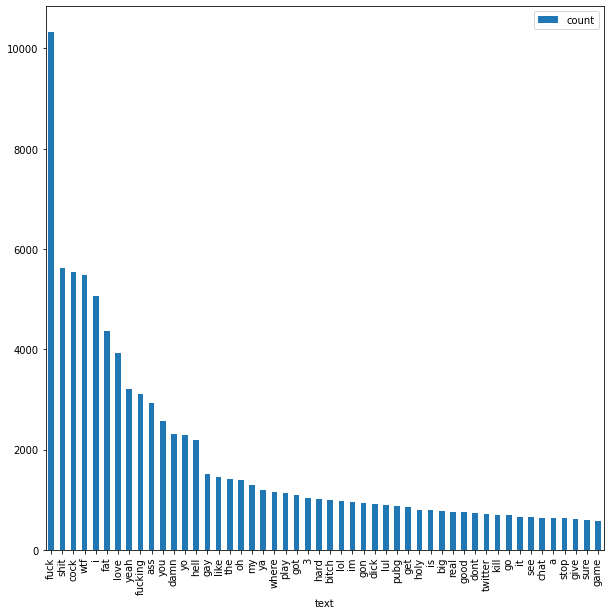

In [170]:
top50 = wordsNR.head(50)
top50.plot.bar(x="text",y="count",figsize=(10,10))

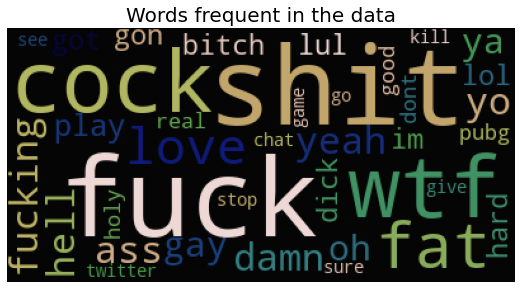

In [172]:
text = top50['text'].values

wordcloud = WordCloud().generate(' '.join(text))
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequent in the data", fontsize=20)
plt.imshow(wordcloud.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

In [174]:
wordsNR.to_csv('WithoutRulesFinal.csv',index=False)

###Whole data With Rules

In [176]:
dfWR = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DATASCI/project/withrules/WithRules.csv')
dfWR.tail()

text  ...   neither
1311972                                         I WAS HERE  ...  0.584512
1311973                                    Downtime forver  ...  0.630171
1311974                               I want my money back  ...  0.537517
1311975  no game to update KEKW no game to update KEKW ...  ...  0.658390
1311976  Streamers are in on this it is a new update bo...  ...  0.707890

[5 rows x 5 columns]

In [177]:
dfWR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311977 entries, 0 to 1311976
Data columns (total 5 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   text                1311977 non-null  object 
 1   top_class           1311977 non-null  object 
 2   hate_speech         1311977 non-null  float64
 3   offensive_language  1311977 non-null  float64
 4   neither             1311977 non-null  float64
dtypes: float64(3), object(2)
memory usage: 50.0+ MB


In [178]:
#Drop unecessary columns
dfWR =dfWR.drop(["hate_speech", "offensive_language", "neither"], axis=1)
#Make top_class binary as toxic(1) or not toxic(0)
dfWR['toxic'] = dfWR['top_class'].apply(lambda x: change_label(x))
#convert text to string type
dfWR['text'] = dfWR['text'].astype(str)

In [179]:
dfWR.tail()

text top_class  toxic
1311972                                         I WAS HERE   neither      0
1311973                                    Downtime forver   neither      0
1311974                               I want my money back   neither      0
1311975  no game to update KEKW no game to update KEKW ...   neither      0
1311976  Streamers are in on this it is a new update bo...   neither      0

In [182]:
dfWR['toxic'].value_counts(normalize=True)

0    0.966497
1    0.033503
Name: toxic, dtype: float64

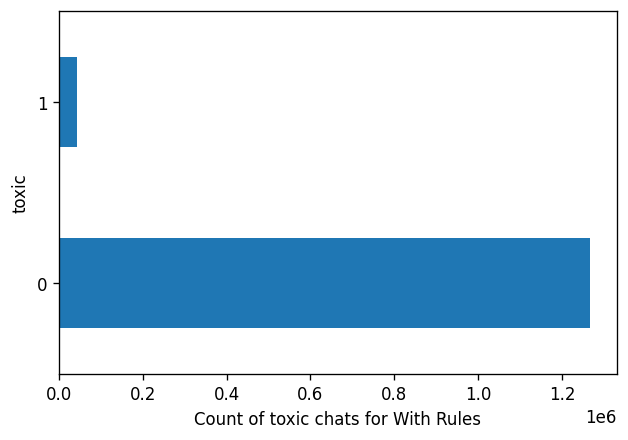

In [180]:
fig, ax = plt.subplots(figsize=(6,4), dpi=120)
dfWR.groupby('toxic')['toxic'].count().plot(kind='barh', ax=ax)
ax.set_xlabel('Count of toxic chats for With Rules');

In [183]:
dfWR['text']=dfWR['text'].apply(lambda x: lower_case(x))
dfWR.tail()

text top_class  toxic
1311972                                         i was here   neither      0
1311973                                    downtime forver   neither      0
1311974                               i want my money back   neither      0
1311975  no game to update kekw no game to update kekw ...   neither      0
1311976  streamers are in on this it is a new update bo...   neither      0

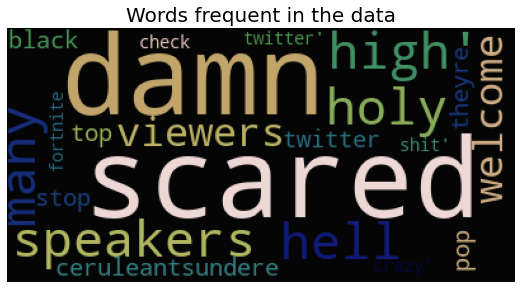

In [184]:
subset=dfWR[dfWR['toxic']==1]
text = subset.text.values
wordcloud = WordCloud().generate(str(text))
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequent in the data", fontsize=20)
plt.imshow(wordcloud.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

In [186]:
subsetWR=dfWR[dfNR['toxic']==1]
textWR=subsetWR['text'].values
textWR = ' '.join([str(elem) for elem in text])
#remove non words such as punctuation
textWR=re.sub(pattern = "[^\w\s]", repl = "", string = textWR)
#remove emotes preliminary
textWR=re.sub(pattern = "(cerulean)\w+", repl = "", string = textWR)
textWR=re.sub(pattern = "(geekand)\w+", repl = "", string = textWR)
textWR=re.sub(pattern = "(moon)\w+", repl = "", string = textWR)
textWR=re.sub(pattern = "(ninja)\w+", repl = "", string = textWR)

textWR=re.sub(pattern = "(\s\s+)", repl = " ", string = textWR)
textWR

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


'that scared the out of me damn my speakers were on high holy hell how many viewers are in this welcome once you pop that top you cant stop before i cant talk because im not a sub i just wanted to say i love you all love to all critters gandslessthanthree catvelcro sure sure rub it in i want to see her get that armor this is buffering like crazy bidet all bidet from hard rock country its fukin time hell yeah so bidet all does everyone else have a loading screen kill the music ya yeah 3 ashley 3 hell yes wolfgar83 sure is kill the music wtf is going on sam you are a god how long have they been doing this show and they cant get the damn settings standardized jesus lmao wtf the hell wtf what the hell man you can tell they all need this samwhat is this shit xd if mercer doesnt end with high noonso much disappointment lol honestly could use more of marisha talking about her rear end damn holy shit gandsscanlan gandsscanlan i just what the helldammit sam good job hahahaha i havent laughed th

In [187]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [188]:
text_tokens = word_tokenize(textWR)

tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

print(tokens_without_sw)

['scared', 'damn', 'speakers', 'high', 'holy', 'hell', 'many', 'viewers', 'welcome', 'pop', 'top', 'cant', 'stop', 'cant', 'talk', 'wanted', 'say', 'love', 'love', 'critters', 'gandslessthanthree', 'catvelcro', 'sure', 'sure', 'rub', 'see', 'get', 'armor', 'buffering', 'like', 'crazy', 'bidet', 'bidet', 'hard', 'rock', 'country', 'fukin', 'time', 'hell', 'yeah', 'bidet', 'everyone', 'else', 'loading', 'screen', 'kill', 'music', 'yeah', '3', 'ashley', '3', 'hell', 'yes', 'wolfgar83', 'sure', 'kill', 'music', 'wtf', 'going', 'sam', 'god', 'long', 'show', 'cant', 'get', 'damn', 'settings', 'standardized', 'jesus', 'lmao', 'wtf', 'hell', 'wtf', 'hell', 'tell', 'need', 'samwhat', 'shit', 'xd', 'mercer', 'doesnt', 'high', 'noonso', 'much', 'disappointment', 'lol', 'honestly', 'could', 'use', 'marisha', 'talking', 'rear', 'damn', 'holy', 'shit', 'gandsscanlan', 'gandsscanlan', 'helldammit', 'sam', 'good', 'job', 'hahahaha', 'havent', 'laughed', 'hard', 'since', 'vox', 'moochina', 'sam', 'damn

In [189]:
textWR = ' '.join([str(elem) for elem in tokens_without_sw])
# textWR=textNR.lower()
textWR

'scared damn speakers high holy hell many viewers welcome pop top cant stop cant talk wanted say love love critters gandslessthanthree catvelcro sure sure rub see get armor buffering like crazy bidet bidet hard rock country fukin time hell yeah bidet everyone else loading screen kill music yeah 3 ashley 3 hell yes wolfgar83 sure kill music wtf going sam god long show cant get damn settings standardized jesus lmao wtf hell wtf hell tell need samwhat shit xd mercer doesnt high noonso much disappointment lol honestly could use marisha talking rear damn holy shit gandsscanlan gandsscanlan helldammit sam good job hahahaha havent laughed hard since vox moochina sam damn genius wtf xd love much hell watch loot crate damn thats soo impressive rearend sam fuckin gandsscanlan gandsscanlan gandsscanlan gandsscanlan lol wit kill brog really wish sony would fix shitty streaming issues could watch playstation instead phone wtf alpha guess super hard figure yall need jesus youve got devil broadcastin

In [191]:
#Remove Eomtes post nltk
textWR=re.sub(pattern = "(cerulean)\w+", repl = "", string = textWR)
textWR=re.sub(pattern = "(geekand)\w+", repl = "", string = textWR)
textWR=re.sub(pattern = "(moon)\w+", repl = "", string = textWR)
textWR=re.sub(pattern = "(ninja)\w+", repl = "", string = textWR)
textWR=re.sub(pattern = "(\s\s+)", repl = " ", string = textWR)
textWR

'scared damn speakers high holy hell many viewers welcome pop top cant stop cant talk wanted say love love critters gandslessthanthree catvelcro sure sure rub see get armor buffering like crazy bidet bidet hard rock country fukin time hell yeah bidet everyone else loading screen kill music yeah 3 ashley 3 hell yes wolfgar83 sure kill music wtf going sam god long show cant get damn settings standardized jesus lmao wtf hell wtf hell tell need samwhat shit xd mercer doesnt high noonso much disappointment lol honestly could use marisha talking rear damn holy shit gandsscanlan gandsscanlan helldammit sam good job hahahaha havent laughed hard since vox moochina sam damn genius wtf xd love much hell watch loot crate damn thats soo impressive rearend sam fuckin gandsscanlan gandsscanlan gandsscanlan gandsscanlan lol wit kill brog really wish sony would fix shitty streaming issues could watch playstation instead phone wtf alpha guess super hard figure yall need jesus youve got devil broadcastin

In [194]:
wordsWR=textWR.split(' ')
wordsWR=dict(Counter(wordsWR))
wordsWR=pd.DataFrame.from_dict(wordsWR, orient='index').reset_index()
wordsWR.columns=['text','count']
wordsWR =wordsWR.sort_values(by=['count'],ascending=False)
wordsWR

text  count
619         fuck   3524
58          shit   3108
45           wtf   2192
16          love   2188
1           damn   2159
...          ...    ...
7861     slavers      1
7862   missandes      1
7863     trusted      1
7866      denied      1
16052     cherck      1

[16053 rows x 2 columns]

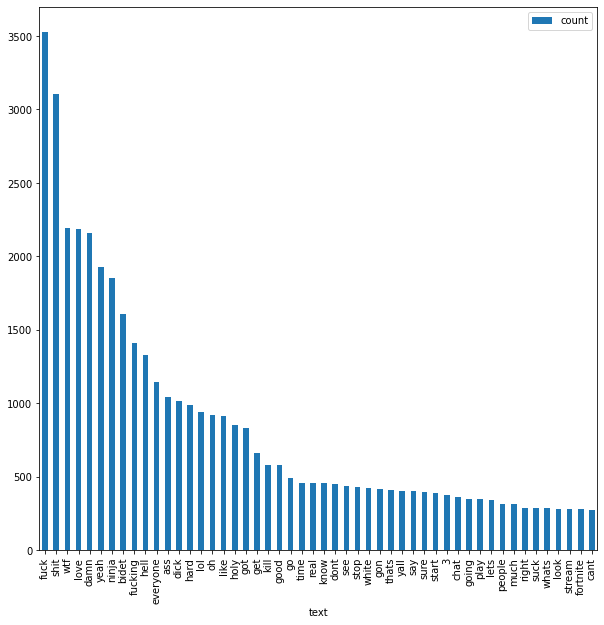

In [195]:
top50 = wordsWR.head(50)
top50.plot.bar(x="text",y="count",figsize=(10,10))

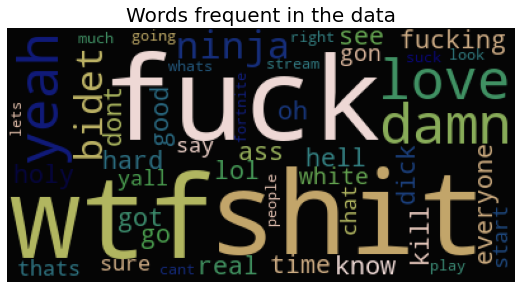

In [196]:
text = top50['text'].values

wordcloud = WordCloud().generate(' '.join(text))
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequent in the data", fontsize=20)
plt.imshow(wordcloud.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

In [197]:
wordsWR.to_csv('WithRulesFinal.csv',index=False)

###Merge similar in both With and No rules

In [202]:
print(wordsNR.shape)
print(wordsWR.shape)

(19776, 2)
(16053, 2)


In [209]:
mergedf=pd.merge(wordsNR,wordsWR,on='text')

In [211]:
mergedf.columns=['text','NoRules','WithRules']
mergedf

text  NoRules  WithRules
0          fuck    10323       3524
1          shit     5618       3108
2          cock     5539          3
3           wtf     5472       2192
4           fat     4362         39
...         ...      ...        ...
5753      holyy        1          1
5754      blink        1          2
5755  carlsmile        1          1
5756        iit        1          1
5757      fills        1          1

[5758 rows x 3 columns]

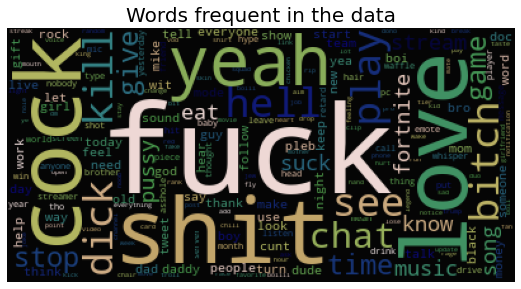

In [212]:
text = mergedf['text'].values
wordcloud = WordCloud().generate(' '.join(text))
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequent in the data", fontsize=20)
plt.imshow(wordcloud.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

In [229]:
top20 = mergedf.head(50)
top20.head()

text  NoRules  WithRules
0  fuck    10323       3524
1  shit     5618       3108
2  cock     5539          3
3   wtf     5472       2192
4   fat     4362         39

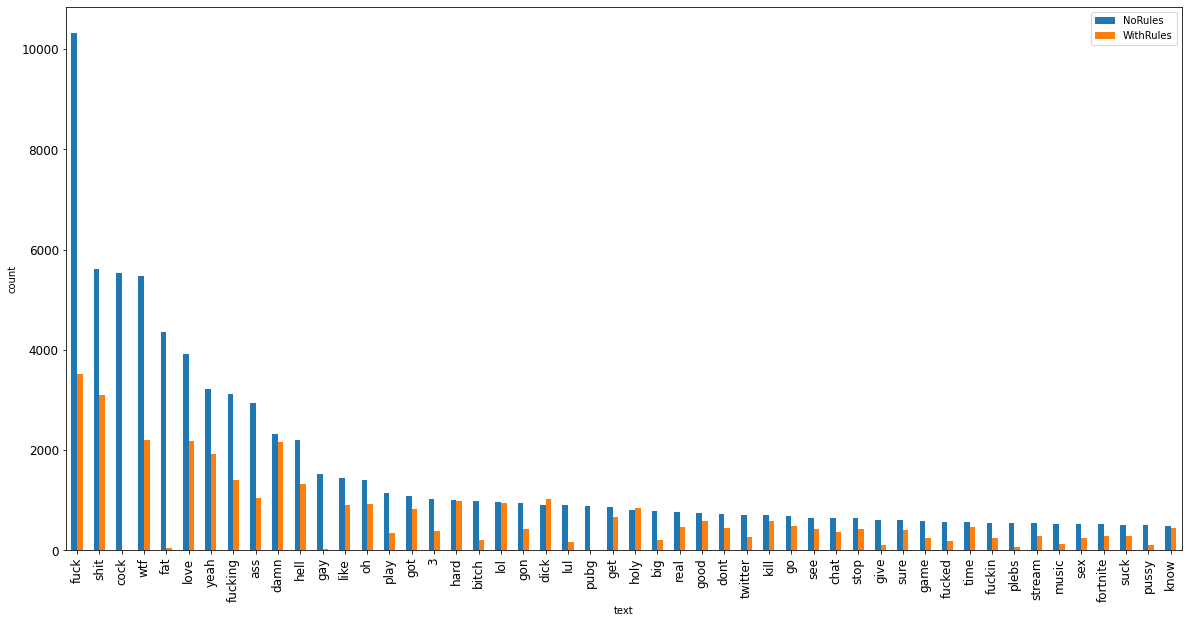

In [239]:
top20.plot.bar(x='text',ylabel="count", fontsize='large',figsize=(20,10))

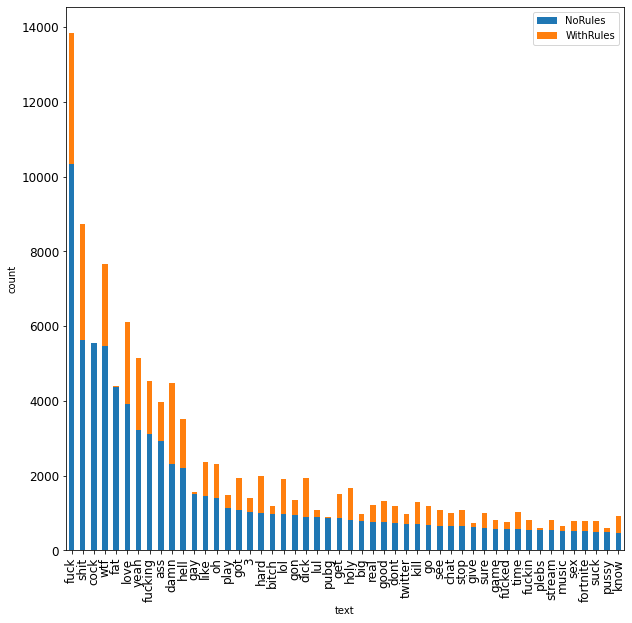

In [237]:
top20.plot.bar(x='text',stacked=True,ylabel="count",fontsize='large',figsize=(10,10))

In [240]:
mergedf.to_csv('SimilarWords.csv',index=False)

In [242]:
temp = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DATASCI/project/SimilarWords.csv')
temp.head()

text  NoRules  WithRules
0  fuck    10323       3524
1  shit     5618       3108
2  cock     5539          3
3   wtf     5472       2192
4   fat     4362         39